In [64]:
import gym
from gym import spaces
import numpy as np
from numpy import random
import seaborn
import time
import matplotlib.pyplot as plt
import time

# PART I: Define the Environment

The environment that we defined is called "GameEnv". It is a 4x4 grid world where the agent moves around to collect rewards, avoid traps, and reach the goal to collect a final reward.

**Actions**

The agent has 4 possible actions:

- Move right
- Move left
- Move up
- Move down

**States**

The states are represented by a 4x4 grid where each cell can have one of the following values:

+ 1 if the agent is present in that cell
+ 0.8 if the cell contains the target goal position
+ 0.6 if the cell contains the +5 gold coin
+ 0.4 if the cell contains the +4 gold coin
+ 0.2 if the cell contains the -7 trap
+ 0.1 if the cell contains the -6 trap

**Rewards**

The agent receives different rewards based on the state it moves to after taking an action:

- +20 if the agent reaches the target goal position
- +5 or +4 if the agent reaches the respective gold coins
- -7 or -6 if the agent enters the respective trap

**Objective**

The main objective of the agent is to navigate through the grid world and reach the target goal position while collecting the largest possible reward.


In [65]:
class GameEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self, timestep):
        self.action_space = spaces.Discrete(4) 
        self.observation_space = spaces.Discrete(16)  
        self.max_timesteps = timestep
        
        
    def step(self, action):

        #self.state = np.random.choice(self.observation_space.n)
        done = False # initialize done to False
        if action == 0:
            self.agent_pos[0] += 1  #down
        if action == 1:
            self.agent_pos[0] -= 1  #up
        if action == 2:
            self.agent_pos[1] += 1  #right
        if action == 3:
            self.agent_pos[1] -= 1  #left

        self.agent_pos = np.clip(self.agent_pos, 0, 3)
        self.state = np.zeros((4,4))     
        self.state[tuple(self.goal_pos)] = 0.8
        self.state[tuple(self.coin1_pos)] = 0.6
        self.state[tuple(self.coin2_pos)] = 0.5
        self.state[tuple(self.trap1_pos)] = 0.2
        self.state[tuple(self.trap2_pos)] = 0.1
        self.state[tuple(self.agent_pos)] = 1.0
        observation = self.state.flatten()
        reward = 0
        if (self.agent_pos == self.goal_pos).all():
            reward = 20 #Target position: Given big reward if it reaches target
            done = True   #stops the agent from continuing to move (terminal state)
            #print("\nTerminal State reached!\n")

        elif (self.agent_pos == self.trap1_pos).all():
            reward = -7 #A negative reward of -6 if it enters trap

        elif (self.agent_pos == self.trap2_pos).all():
            reward = -6 #A negative reward of -6 if it enters trap
            
        elif (self.agent_pos == self.coin1_pos).all():
            reward = +5 #A reward of +5
            self.coin1_pos = [-1,-1]  #removes the coin once collected

        elif (self.agent_pos == self.coin2_pos).all():
            reward = +4 #A reward of +5
            self.coin2_pos = [-1,-1]  #removes the coin once collected

            
        self.timestep += 1
        if self.timestep >= self.max_timesteps:
            done = True
        info = {}
        return observation, reward, done, info
    


    def reset(self):
        
        self.timestep = 0
        self.state = np.zeros((4,4))
        self.agent_pos = [0,0]
        self.goal_pos = [3,3]       
        self.trap1_pos = [2,0]
        self.trap2_pos = [2,3]
        self.coin1_pos = [1,1]
        self.coin2_pos = [1,3] 

        
        self.state[tuple(self.agent_pos)] = 1.0
        self.state[tuple(self.goal_pos)] = 0.8
        self.state[tuple(self.coin1_pos)] = 0.6
        self.state[tuple(self.coin2_pos)] = 0.4
        self.state[tuple(self.trap1_pos)] = 0.2
        self.state[tuple(self.trap2_pos)] = 0.1
        observation = self.state.flatten()
        return observation

    def render(self):
        plt.imshow(self.state)
       

In [66]:
class RandomAgent:
    def __init__(self, env):
        self.env = env
        self.observation_space = env.observation_space
        self.action_space = env.action_space
    
    def step(self, observation):
        return np.random.choice(self.action_space.n)

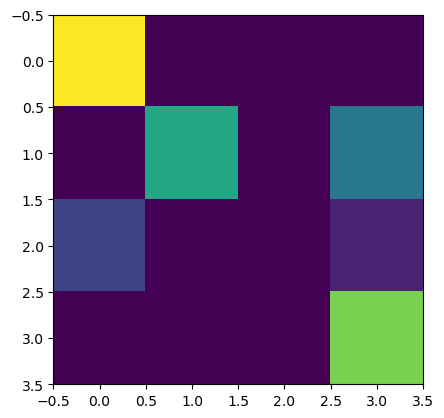

In [67]:
envview = GameEnv(5)
envview.reset()
envview.render()

Step 1
Current state:
 [[1.  0.  0.  0. ]
 [0.  0.6 0.  0.4]
 [0.2 0.  0.  0.1]
 [0.  0.  0.  0.8]]
Chosen action:  2 (Right)
New state:
 [[0.  1.  0.  0. ]
 [0.  0.6 0.  0.5]
 [0.2 0.  0.  0.1]
 [0.  0.  0.  0.8]]
Reward:  0 

Step 2
Current state:
 [[0.  1.  0.  0. ]
 [0.  0.6 0.  0.5]
 [0.2 0.  0.  0.1]
 [0.  0.  0.  0.8]]
Chosen action:  2 (Right)
New state:
 [[0.  0.  1.  0. ]
 [0.  0.6 0.  0.5]
 [0.2 0.  0.  0.1]
 [0.  0.  0.  0.8]]
Reward:  0 

Step 3
Current state:
 [[0.  0.  1.  0. ]
 [0.  0.6 0.  0.5]
 [0.2 0.  0.  0.1]
 [0.  0.  0.  0.8]]
Chosen action:  3 (Left)
New state:
 [[0.  1.  0.  0. ]
 [0.  0.6 0.  0.5]
 [0.2 0.  0.  0.1]
 [0.  0.  0.  0.8]]
Reward:  0 

Step 4
Current state:
 [[0.  1.  0.  0. ]
 [0.  0.6 0.  0.5]
 [0.2 0.  0.  0.1]
 [0.  0.  0.  0.8]]
Chosen action:  0 (Down)
New state:
 [[0.  0.  0.  0. ]
 [0.  1.  0.  0.5]
 [0.2 0.  0.  0.1]
 [0.  0.  0.  0.8]]
Reward:  5 

Step 5
Current state:
 [[0.  0.  0.  0. ]
 [0.  1.  0.  0.5]
 [0.2 0.  0.  0.1]
 [0.  0.  

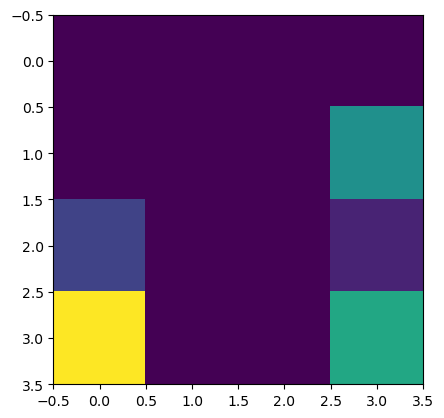

In [68]:
#Test the environment is working
timestep=10

envtest = GameEnv(timestep)
envtest.reset()

agent = RandomAgent(envtest)

obs = envtest.reset()
done = False
step_labels={0: "(Down)", 1:"(Up)", 2: "(Right)", 3:"(Left)"}

rwd=0
step=0
while not done:
    step=step+1
    print("Step",step)
    action = agent.step(obs)
    print("Current state:\n", envtest.state)
    print("Chosen action: ", action, step_labels[action])
    observation, reward, done, info = envtest.step(action)
    rwd+=reward
    print("New state:\n", envtest.state)
    print("Reward: ", reward,'\n')
    #print("Info", info)
    envtest.render()
    
print("Total Reward:", rwd)


# PART 2 Step 1: Implementating SARSA

In [69]:
## functions ##

#Define epsilon-greedy function
def greedyEp(state, Q, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        #print("chosen random")
        act = np.random.choice(env.action_space.n)
    else:
        #print("chosen greedy")
        act = np.argmax(Q[np.where(state==1)[0][0]][:])
    return act


#Define SARSA
def SARSA(env, timestep, total_episodes, alpha, gamma, epsilon, decay):
    
    #define parameters to track reward, loss, average steps for plots
    total_reward =[]
    avg_loss=0
    total_loss=[]
    step_count=0
    avg_steps=[]

    #Initializing the Q table
    Q= np.zeros((env.observation_space.n, env.action_space.n))

    for episode in range(total_episodes):
        #print("Episode:", episode+1)
        ep_reward=0
        step=0
        state = env.reset()
        done=False

        while not done:
            step=step+1
            action = greedyEp(state, Q, epsilon)
            next_state, reward, done, info= env.step(action)

            #Choosing the next action
            next_action = greedyEp(next_state, Q, epsilon)

            #Calculating new Q table row at this state
            prediction = Q[np.where(state==1)[0][0]][action]
            target = reward + gamma * Q[np.where(next_state==1)[0][0]][next_action]
            loss=target - prediction
            avg_loss +=loss
            Q[np.where(state==1)[0][0]][action] = Q[np.where(state==1)[0][0]][action] + alpha * loss
            state = next_state
            action = next_action

            #Tracking reward
            ep_reward =ep_reward+ reward

            #Decrease epsilon
            if epsilon > 0.01:
                epsilon =epsilon*decay

        #track data for plots and print progress periodically
        step_count+=step       
        total_reward.append(ep_reward)
        total_loss.append(avg_loss/20)
        if (episode%100==0):
            avg_steps.append(step_count/100)
            step_count=0
            print("Episode",episode+1,"/",total_episodes,"complete")
            print("Current Q-table:\n", Q,"\n\n")
            
    print("Episode",episode+1,"/",total_episodes,"complete")
    print("Current Q-table:\n", Q,"\n\n")
    print("Done!")
    return Q, total_reward, total_loss, avg_steps

In [70]:
#define parameters
timestep=25
total_episodes = 2000
alpha = 0.1
gamma = 0.9
epsilon = 1
decay=(0.01/epsilon)**(1/total_episodes)

#define new environment
env = GameEnv(timestep)
env.reset()

#get results from running SARSA
Q, reward, loss, avg_step = SARSA(env, timestep, total_episodes, alpha, gamma, epsilon, decay)

Episode 1 / 2000 complete
Current Q-table:
 [[ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.36  0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [-0.6   0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.   -0.6   0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]] 


Episode 101 / 2000 complete
Current Q-table:
 [[ 5.55460554e+00  4.63601121e-01  2.55419156e-01  3.23224871e-01]
 [ 1.71703940e+00  2.73168237e-01  5.53108810e-02  3.68511522e-01]
 [ 0.00000000e+00  0.00000000e+00  3.92313246e-01  3.72133063e-02]
 [ 8.37622899e-01  2.30215028e-01  1.52270688e-01  3.10599712e-02]
 [-5.93331255e+00  9.27452647e-01  6.31941428e+00  7.69946687e-01]
 [ 1.70110098e-01  3.84389982e-01  1.51851813e+00  1.35627757e+00]
 [ 1.04885620e+00  8.74145786e-02  1.66673810e+00  4.51033768e-01]
 [ 6.

Episode 801 / 2000 complete
Current Q-table:
 [[ 1.62990856e+01  5.16310455e+00  1.85798866e+00  1.71104117e+00]
 [ 8.95029073e+00  2.73168237e-01  5.53108810e-02  3.68511522e-01]
 [ 0.00000000e+00  0.00000000e+00  5.36246598e-01  3.72133063e-02]
 [ 1.91934811e+00  2.30215028e-01  1.52270688e-01  3.10599712e-02]
 [-5.93331255e+00  5.58282273e+00  1.81197053e+01  7.69946687e-01]
 [ 9.49572779e-01  1.31123162e+00  1.45797856e+01  2.85139075e+00]
 [ 1.61999977e+01  1.71187818e-01  4.19562821e+00  1.79798856e+00]
 [ 1.17920085e+00  5.19511283e-01  6.93872850e-01  7.51459507e+00]
 [ 7.50724200e-03  1.07191297e+00  1.07676304e-01 -1.26346897e+00]
 [ 1.30784220e-01  5.64471323e+00  1.15272558e-01 -1.28066214e+00]
 [ 1.80000000e+01  1.45791029e+00  1.80301433e+00  3.52939543e-01]
 [ 1.62939596e+01  3.60000000e-01 -2.20974000e+00  0.00000000e+00]
 [-5.70122077e-02 -1.20359105e+00  3.25230098e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  6.27665600e+00  0.00000000e+00]
 [ 1.81490776e+0

Episode 1901 / 2000 complete
Current Q-table:
 [[ 1.63097676e+01  6.11113534e+00  3.18530665e+00  2.99650866e+00]
 [ 1.12321541e+01  2.73168237e-01  5.53108810e-02  3.68511522e-01]
 [ 0.00000000e+00  0.00000000e+00  5.36246598e-01  3.72133063e-02]
 [ 1.91934811e+00  2.30215028e-01  1.52270688e-01  3.10599712e-02]
 [-5.27092488e+00  6.44874368e+00  1.81219943e+01  7.05665263e+00]
 [ 1.80097873e+00  2.77906659e+00  1.45799993e+01  8.18019606e+00]
 [ 1.62000000e+01  1.71187818e-01  6.78676260e+00  4.77516963e+00]
 [ 1.17920085e+00  5.19511283e-01  6.93872850e-01  9.92053221e+00]
 [ 7.50724200e-03  6.18914216e+00  1.07676304e-01 -1.26346897e+00]
 [ 1.30784220e-01  7.05823005e+00  1.15272558e-01 -1.28066214e+00]
 [ 1.80000000e+01  5.94370379e+00  4.33714447e+00  3.52939543e-01]
 [ 1.75684669e+01  3.60000000e-01 -2.20974000e+00  0.00000000e+00]
 [-5.70122077e-02 -1.20359105e+00  3.25230098e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.10774826e+01  0.00000000e+00]
 [ 6.20106776e+

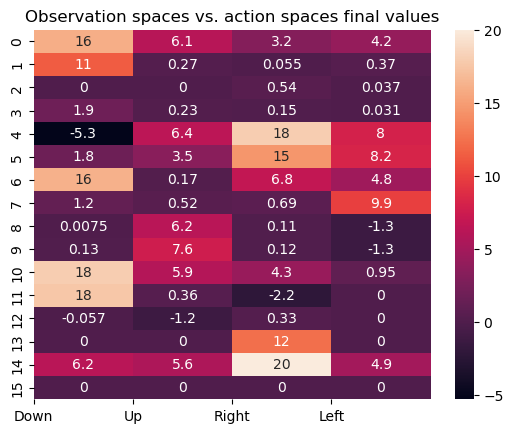

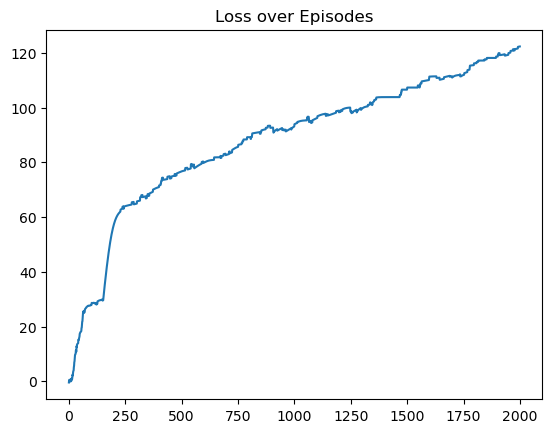

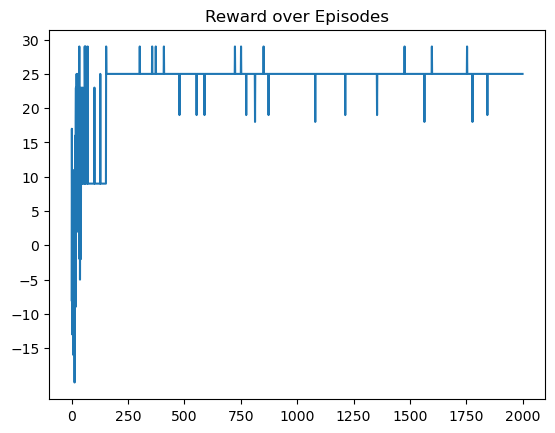

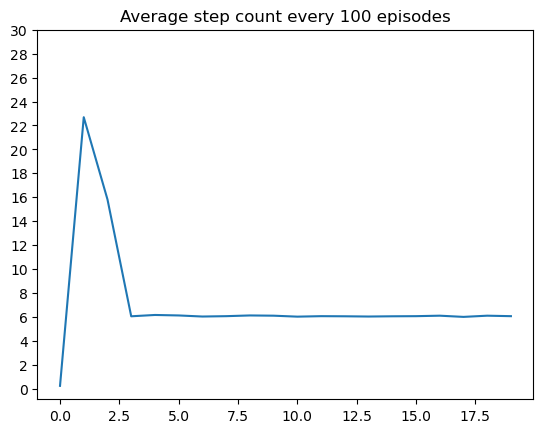

In [71]:
#action_labels={0: "(Down)", 1:"(Up)", 2: "(Right)", 3:"(Left)"}

seaborn.heatmap(Q, annot=True)
plt.title("Observation spaces vs. action spaces final values")
plt.xticks([0,1,2,3],['Down', 'Up', 'Right', 'Left'])
plt.show()
plt.plot(loss)
plt.title("Loss over Episodes")
plt.show()
plt.plot(reward)
plt.title("Reward over Episodes")
plt.yticks(np.arange(-15, 35, step=5))
plt.show()
plt.plot(avg_step)
plt.title("Average step count every 100 episodes")
plt.yticks(np.arange(0, 31, step=2))
plt.show()

**Parameter #1: Number of Max Timesteps**

Default in base SARSA algorithm was 25 timesteps. Decreasing the timesteps will improve runtime; we will see if we can still maintain good convergence while lowering the max timestep. 

In [72]:
#Max Timesteps: 20 timesteps

#define parameters
timestep=20
total_episodes = 2000
alpha = 0.1
gamma = 0.9
epsilon = 1
decay=(0.01/epsilon)**(1/total_episodes)

#define new environment
env = GameEnv(timestep)
env.reset()

Q, reward, loss, avg_step = SARSA(env, timestep, total_episodes, alpha, gamma, epsilon, decay)

Episode 1 / 2000 complete
Current Q-table:
 [[ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.4  0. ]
 [-0.6  0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 2.   0.  -0.6  0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]] 


Episode 101 / 2000 complete
Current Q-table:
 [[-1.15109251e-01  3.95119274e-01  2.03146505e+00  1.69568606e-01]
 [ 2.32838909e+00  1.17068977e+00  5.86499921e-01  1.05619095e+00]
 [ 1.34098321e+00  1.18675586e-01  1.35373257e-01  4.50000000e-02]
 [ 1.29222053e+00  5.24055334e-02  6.58619752e-02  1.01031109e-02]
 [-4.43956461e+00  1.88002723e-01  2.14672207e+00  1.20790360e-01]
 [ 3.37892251e-01  2.24174113e+00  1.30430772e+00  1.01106585e+00]
 [ 2.28278348e-01  2.74954690e-01  1.62715238e+00  1.65857822e+00]
 [-2.25786062e+00  2.92639899e-01  1.13264709e-01  1.61894496e+00]
 [

Episode 901 / 2000 complete
Current Q-table:
 [[-1.15109251e-01  1.06065690e+00  2.23844348e+00  5.16173788e-01]
 [ 2.43592685e+00  2.23925186e+00  1.62996037e+00  1.87439750e+00]
 [ 2.11044721e+00  1.18675586e-01  1.35373257e-01  2.77073992e-01]
 [ 1.29222053e+00  5.24055334e-02  6.58619752e-02  1.01031109e-02]
 [-4.43956461e+00  3.52611072e-01  2.18205512e+00  1.20790360e-01]
 [ 9.25800463e-01  2.35440049e+00  2.07262562e+00  1.71531105e+00]
 [ 2.28278348e-01  3.80513963e-01  1.62715238e+00  2.81006935e+00]
 [-2.25786062e+00  2.92639899e-01  1.13264709e-01  1.61894496e+00]
 [-2.25848006e-01 -6.73295498e-01 -5.17302982e-03 -2.42338424e+00]
 [ 4.39020000e-02  1.74935004e+00  0.00000000e+00 -2.56614872e+00]
 [ 4.87800000e-01  9.70065814e-01 -1.37220000e+00  7.21438018e-03]
 [ 8.19020000e+00  3.63430463e-01 -6.00000000e-01  6.49294216e-04]
 [ 0.00000000e+00 -3.42752687e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  9.26820000e-01  0.00000000e+00]
 [ 0.00000000e+0

Episode 1901 / 2000 complete
Current Q-table:
 [[ 5.11367050e-01  1.31884506e+00  2.26074082e+00  1.02903416e+00]
 [ 2.51343109e+00  2.41864952e+00  2.08849302e+00  2.01522596e+00]
 [ 2.20678131e+00  1.18675586e-01  1.35373257e-01  2.77073992e-01]
 [ 1.29222053e+00  5.24055334e-02  6.58619752e-02  1.01031109e-02]
 [-4.43956461e+00  5.23069129e-01  2.37658916e+00  3.48431031e-01]
 [ 1.76030396e+00  2.43389684e+00  2.11142800e+00  2.30229876e+00]
 [ 2.92756437e-01  3.80513963e-01  1.62715238e+00  2.24470138e+00]
 [-2.25786062e+00  2.92639899e-01  1.13264709e-01  1.61894496e+00]
 [-2.25848006e-01 -6.73295498e-01  1.52785777e-01 -2.42338424e+00]
 [ 4.39020000e-02  2.16699960e+00  0.00000000e+00 -3.00999942e+00]
 [ 4.87800000e-01  1.07544286e+00 -1.37220000e+00  7.21438018e-03]
 [ 8.19020000e+00  3.63430463e-01 -6.00000000e-01  6.49294216e-04]
 [ 0.00000000e+00 -3.42752687e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  9.26820000e-01  0.00000000e+00]
 [ 0.00000000e+

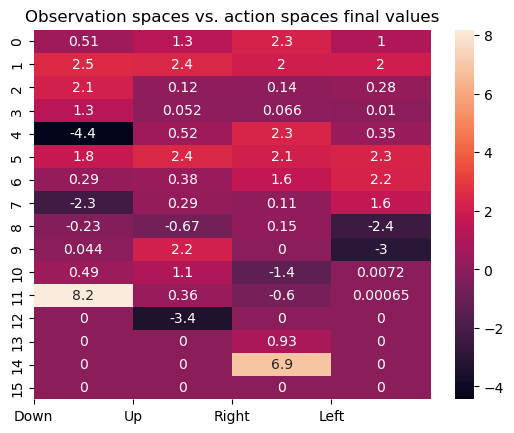

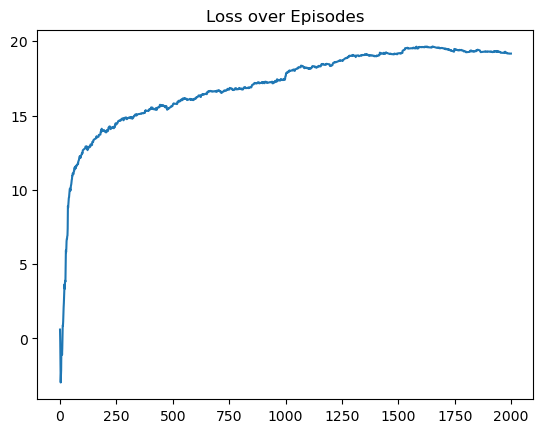

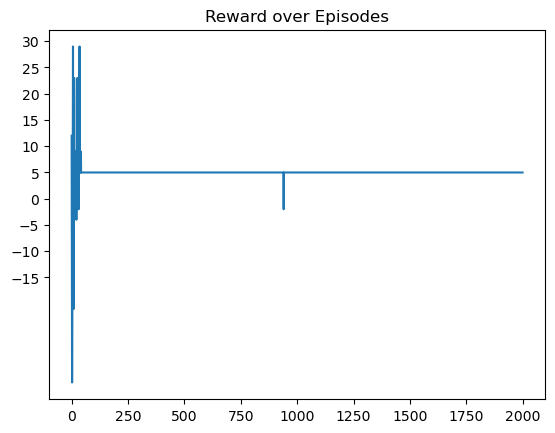

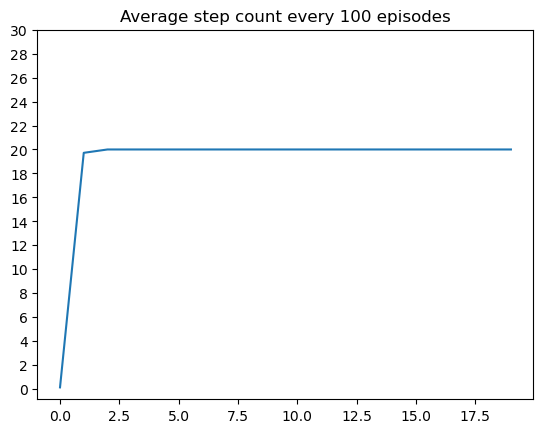

In [73]:
#action_labels={0: "(Down)", 1:"(Up)", 2: "(Right)", 3:"(Left)"}

seaborn.heatmap(Q, annot=True)
plt.title("Observation spaces vs. action spaces final values")
plt.xticks([0,1,2,3],['Down', 'Up', 'Right', 'Left'])
plt.show()
plt.plot(loss)
plt.title("Loss over Episodes")
plt.show()
plt.plot(reward)
plt.title("Reward over Episodes")
plt.yticks(np.arange(-15, 35, step=5))
plt.show()
plt.plot(avg_step)
plt.title("Average step count every 100 episodes")
plt.yticks(np.arange(0, 31, step=2))
plt.show()

In [74]:
#Max Timesteps: 18

#define parameters
timestep=18
total_episodes = 2000
alpha = 0.1
gamma = 0.9
epsilon = 1
decay=(0.01/epsilon)**(1/total_episodes)

#define new environment
env = GameEnv(timestep)
env.reset()

Q, reward, loss, avg_step = SARSA(env, timestep, total_episodes, alpha, gamma, epsilon, decay)

Episode 1 / 2000 complete
Current Q-table:
 [[ 0.     0.     0.     0.   ]
 [ 0.5    0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]
 [-1.897  0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]
 [ 0.     0.     0.    -0.7  ]
 [ 0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]] 


Episode 101 / 2000 complete
Current Q-table:
 [[-8.94932171e-02  6.70639959e-01  2.76056133e+00  7.99151361e-01]
 [ 4.36869774e+00  1.88770956e+00  1.14263221e+00  1.25071280e+00]
 [ 3.26916000e-02  2.07223345e-01  0.00000000e+00  1.99552106e+00]
 [ 8.22214002e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-4.67051413e+00  3.89899644e-01  1.56023303e+00 -5.81333823e-01]
 [ 3.94369428e+00  2.61273636e+00  6.67279722e-01  8.49908153e-01]
 [ 6.037

Episode 1101 / 2000 complete
Current Q-table:
 [[ 3.34346334e-01  7.02634185e+00  1.62881563e+01  3.22196520e+00]
 [ 1.81172649e+01  3.31878914e+00  2.03574039e+00  5.79556127e+00]
 [ 3.26916000e-02  2.07223345e-01  0.00000000e+00  6.87252506e+00]
 [ 8.22214002e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-4.67051413e+00  3.89899644e-01  5.95490979e+00 -5.81333823e-01]
 [ 1.45788329e+01  6.13665175e+00  7.36821184e-01  1.27973890e+00]
 [ 6.03748019e-01  2.25768295e-01  1.52810939e+00  1.25902316e-01]
 [-1.97836795e+00  0.00000000e+00 -1.78053115e-01  1.37477499e+00]
 [ 0.00000000e+00  2.86771864e-02  7.74524785e+00 -1.33000000e+00]
 [ 1.61998144e+01  5.35001387e+00  3.03419891e+00 -2.47308626e+00]
 [ 1.16380209e+01  3.26916000e-02 -1.53865196e+00  5.54013388e-02]
 [ 0.00000000e+00  6.36669100e-01  0.00000000e+00  2.94224400e-03]
 [-1.70494170e-01 -1.89437966e+00  4.38821899e+00  0.00000000e+00]
 [ 1.83240471e+00  1.52546462e+00  1.79999860e+01  4.08240000e-01]
 [ 6.40613605e+

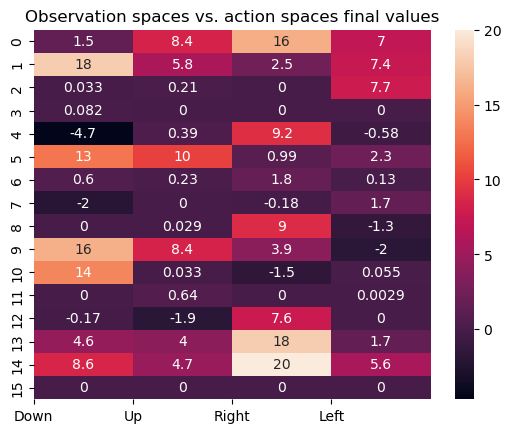

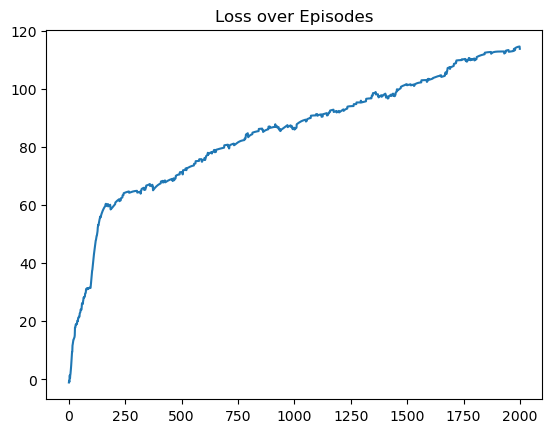

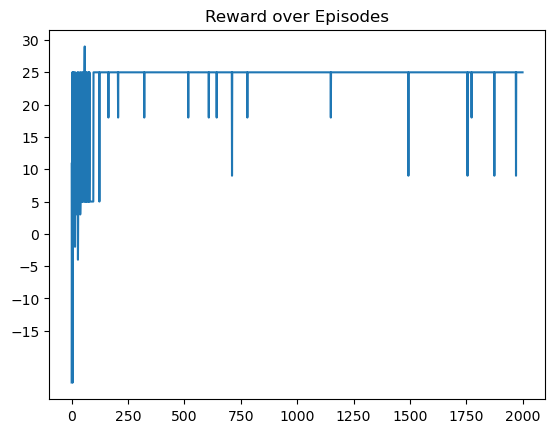

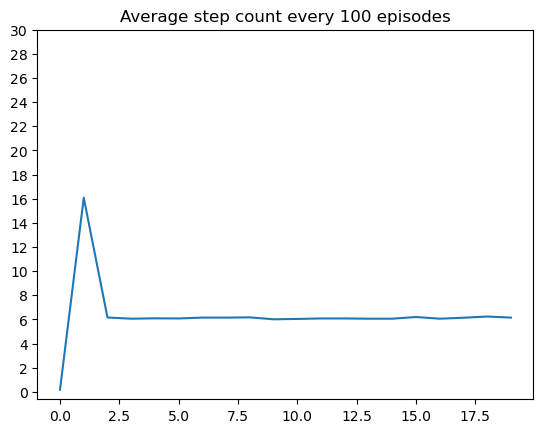

In [75]:
#action_labels={0: "(Down)", 1:"(Up)", 2: "(Right)", 3:"(Left)"}

seaborn.heatmap(Q, annot=True)
plt.title("Observation spaces vs. action spaces final values")
plt.xticks([0,1,2,3],['Down', 'Up', 'Right', 'Left'])
plt.show()
plt.plot(loss)
plt.title("Loss over Episodes")
plt.show()
plt.plot(reward)
plt.title("Reward over Episodes")
plt.yticks(np.arange(-15, 35, step=5))
plt.show()
plt.plot(avg_step)
plt.title("Average step count every 100 episodes")
plt.yticks(np.arange(0, 31, step=2))
plt.show()

In [76]:
#Max Timesteps: 16 timesteps

#define parameters
timestep=25
total_episodes = 2000
alpha = 0.1
gamma = 0.9
epsilon = 1
decay=(0.01/epsilon)**(1/total_episodes)

#define new environment
env = GameEnv(timestep)
env.reset()

Q, reward, loss, avg_step = SARSA(env, timestep, total_episodes, alpha, gamma, epsilon, decay)

Episode 1 / 2000 complete
Current Q-table:
 [[0.  0.  0.  0. ]
 [0.5 0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.4 0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]] 


Episode 101 / 2000 complete
Current Q-table:
 [[ 2.76566381e-01  2.75959675e-01  1.74295636e+00  2.54734040e-01]
 [ 1.99818990e+00  1.22847807e+00  4.78779923e-01  5.55762603e-01]
 [ 2.77249274e-01  4.87643147e-02  8.52259131e-02  1.13054357e+00]
 [ 3.38260283e-01  1.15082878e-01  6.63558957e-02  7.11338972e-02]
 [-4.59729314e+00  9.52072617e-02  1.68978356e+00  4.09176583e-01]
 [ 4.10222297e-01  1.93270371e+00  1.75155975e+00  1.12226914e+00]
 [ 3.59582116e-01  8.96225545e-02  3.37231189e+00  1.65355900e-01]
 [-2.86160154e+00  3.30115579e-01 -1.00220482e-01  1.58800649e-01]
 [-1.07730000e-01 -2.85031901e-01 -2.04041759e-03 -7.10773000e-01]

Episode 901 / 2000 complete
Current Q-table:
 [[ 7.59810587e-01  6.11283166e-01  1.80727107e+00  6.18123746e-01]
 [ 1.97318664e+00  1.79982166e+00  1.67385975e+00  1.58048552e+00]
 [ 2.77249274e-01  4.87643147e-02  8.52259131e-02  2.02855203e+00]
 [-9.29826755e-02  7.10395260e-02  7.11334802e-02  1.71553352e-01]
 [-4.83774746e+00  9.52072617e-02  2.20333534e+00  4.09176583e-01]
 [ 1.37274187e+00  1.92961515e+00  1.81088127e+00  1.76926498e+00]
 [ 6.43913396e-01  8.96225545e-02  2.24390789e+00  2.99430358e-01]
 [-1.41691078e+00  1.47554786e-01  2.36565591e-01  1.96428955e+00]
 [-1.07730000e-01 -2.85031901e-01  1.50911838e-01 -7.10773000e-01]
 [ 1.79563548e-03  1.73838235e+00  3.40928093e-01 -6.91440069e-01]
 [ 4.30553803e+00  6.07860000e-02 -3.58980000e-01  3.94106440e-02]
 [ 1.13906558e+01 -5.40000000e-02 -2.58000000e-01  2.30040000e-02]
 [ 0.00000000e+00 -2.47126957e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -4.42732515e-02  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+0

Episode 1901 / 2000 complete
Current Q-table:
 [[ 9.50780242e-01  8.09509237e-01  1.81445457e+00  1.12526471e+00]
 [ 2.01096435e+00  1.91047680e+00  1.82698034e+00  1.71601619e+00]
 [ 2.77249274e-01  4.87643147e-02  8.52259131e-02  1.94010571e+00]
 [-9.29826755e-02  7.10395260e-02  7.11334802e-02  4.92997908e-01]
 [-4.83774746e+00  9.52072617e-02  2.28613655e+00  4.09176583e-01]
 [ 1.61683432e+00  1.94541108e+00  1.83385156e+00  1.78791958e+00]
 [ 1.32458110e+00  8.96225545e-02  1.92846048e+00  2.99430358e-01]
 [-8.50060682e-01  1.63980119e-01  5.27960039e-01  1.87757159e+00]
 [-1.07730000e-01 -2.85031901e-01  1.50911838e-01 -7.10773000e-01]
 [ 1.79563548e-03  1.79887963e+00  3.40928093e-01 -6.91440069e-01]
 [ 5.77776766e+00  6.07860000e-02 -3.58980000e-01  3.94106440e-02]
 [ 1.22515902e+01 -5.40000000e-02 -2.58000000e-01  2.30040000e-02]
 [ 0.00000000e+00 -2.47126957e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -4.42732515e-02  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+

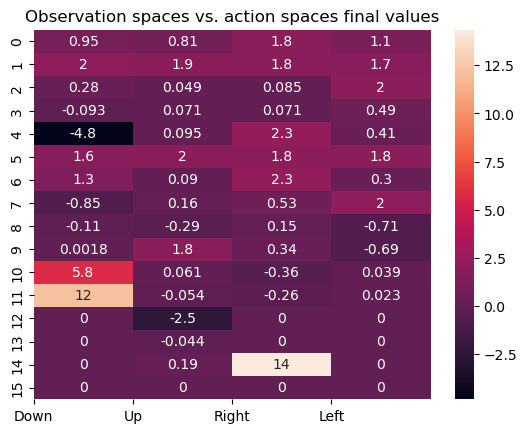

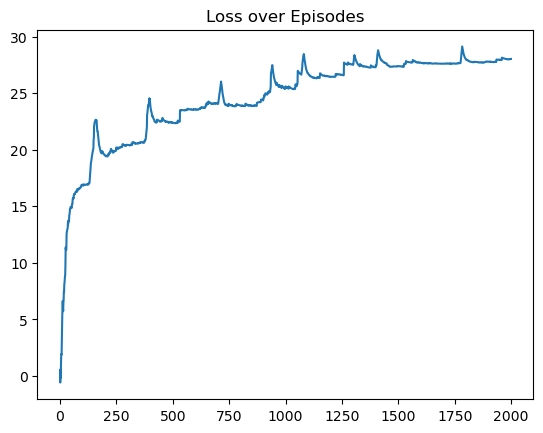

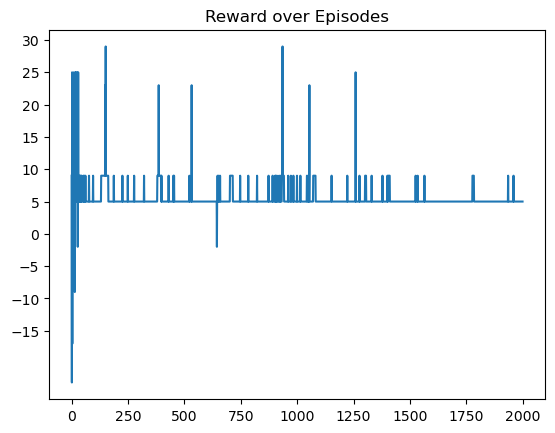

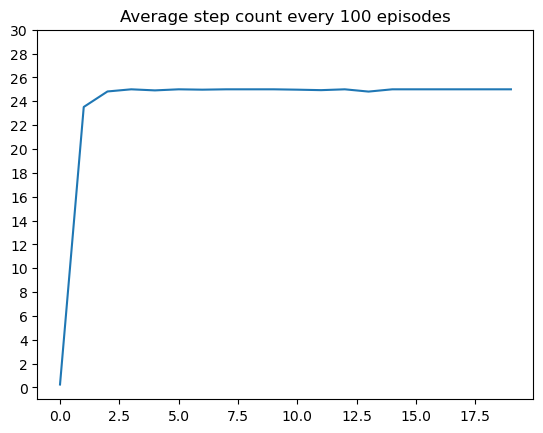

In [77]:
#action_labels={0: "(Down)", 1:"(Up)", 2: "(Right)", 3:"(Left)"}

seaborn.heatmap(Q, annot=True)
plt.title("Observation spaces vs. action spaces final values")
plt.xticks([0,1,2,3],['Down', 'Up', 'Right', 'Left'])
plt.show()
plt.plot(loss)
plt.title("Loss over Episodes")
plt.show()
plt.plot(reward)
plt.title("Reward over Episodes")
plt.yticks(np.arange(-15, 35, step=5))
plt.show()
plt.plot(avg_step)
plt.title("Average step count every 100 episodes")
plt.yticks(np.arange(0, 31, step=2))
plt.show()

**Parameter #2: Value of Gamma**
With an initial gamma value of 0.9, the base SARSA algorithm seems to have deemed the smallest reward on the map, +4 in the corner at [1,3], is not worth the depreciating rewards compared to collecting the +5 reward in the middle of the map and then heading straight to the terminating state. We will adjust the gamma value to 1.0 to see if the agent will now collect all rewards.

In [78]:
#Gamma = 1 (all rewards equal value)

#define parameters
timestep=25
total_episodes = 2000
alpha = 0.1
gamma = 1
epsilon = 1
decay=(0.01/epsilon)**(1/total_episodes)

#define new environment
env = GameEnv(timestep)
env.reset()

Q, reward, loss, avg_step = SARSA(env, timestep, total_episodes, alpha, gamma, epsilon, decay)

Episode 1 / 2000 complete
Current Q-table:
 [[0.045 0.    0.    0.   ]
 [0.    0.    0.    0.   ]
 [0.    0.    0.    0.   ]
 [0.    0.    0.    0.   ]
 [0.    0.    0.45  0.   ]
 [0.    0.    0.    0.   ]
 [0.    0.    0.    0.   ]
 [0.    0.    0.    0.   ]
 [0.    0.    0.    0.   ]
 [0.    0.    0.    0.   ]
 [0.    0.    0.    0.   ]
 [0.    0.    0.    0.   ]
 [0.    0.    0.    0.   ]
 [0.    0.    0.    0.   ]
 [0.    0.    0.    0.   ]
 [0.    0.    0.    0.   ]] 


Episode 101 / 2000 complete
Current Q-table:
 [[ 4.12296972e-01  1.19295075e+00  9.16185861e+00  4.69454442e-01]
 [ 1.11454994e+01  4.07217371e+00  1.89600117e+00  1.10814432e+00]
 [ 8.09198640e-02  4.87472380e-02  6.84000000e-02  4.49949500e+00]
 [ 1.07528503e+00  6.95668000e-02  0.00000000e+00  5.18318406e-02]
 [-3.87740421e+00  3.87042108e-01  4.34118528e+00  2.93699150e-01]
 [ 1.61995750e+00  1.10973434e+01  2.06537193e+00  2.05113229e+00]
 [ 1.81469101e+00  9.40453294e-02  3.23658669e+00  3.34073401e-01]
 [-1.

Episode 1001 / 2000 complete
Current Q-table:
 [[ 1.29042995e+00  6.18524801e+00  5.05737348e+01  1.30639032e+01]
 [ 5.12120242e+01  4.15820023e+01  2.82661648e+01  3.89139612e+01]
 [ 8.09198640e-02  4.87472380e-02  6.84000000e-02  3.94247550e+01]
 [ 1.07528503e+00  6.95668000e-02  0.00000000e+00  5.18318406e-02]
 [-3.87740421e+00  3.87042108e-01  3.61780623e+01  2.93699150e-01]
 [ 1.36607283e+01  5.11607185e+01  5.20115955e+00  2.79728261e+01]
 [ 1.81469101e+00  3.19515712e+00  7.39117608e+00  3.34073401e-01]
 [-1.37560000e+00  3.46176100e-01  0.00000000e+00  6.89356468e+00]
 [ 0.00000000e+00  6.34222712e-01  0.00000000e+00 -3.27291055e+00]
 [ 0.00000000e+00  3.58603300e-01  1.68116996e+01 -2.80056992e+00]
 [ 1.87719960e+01  1.11581504e+00 -1.45200000e+00  4.32929805e-01]
 [ 8.19020000e+00  0.00000000e+00 -1.24600000e+00 -6.00000000e-02]
 [ 0.00000000e+00 -6.95905000e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  2.40675444e-01  0.00000000e+00  0.00000000e+00]
 [ 8.84000000e-

Episode 1801 / 2000 complete
Current Q-table:
 [[ 1.57955110e+01  2.02052949e+01  6.79406326e+01  1.37780424e+01]
 [ 6.91778500e+01  6.22341484e+01  4.76787365e+01  6.01394332e+01]
 [ 8.09198640e-02  4.87472380e-02  6.84000000e-02  5.82147478e+01]
 [ 2.00524414e+00  6.95668000e-02  0.00000000e+00  5.18318406e-02]
 [-3.87740421e+00  3.87042108e-01  6.02806743e+01  2.93699150e-01]
 [ 1.83574433e+01  6.91243434e+01  9.69750747e+00  4.83023276e+01]
 [ 1.81469101e+00  3.19515712e+00  1.11920282e+01  3.34073401e-01]
 [-1.37560000e+00  4.19086994e-01  0.00000000e+00  1.03971596e+01]
 [ 0.00000000e+00  6.34222712e-01  0.00000000e+00 -3.27291055e+00]
 [ 2.40675444e-02  3.58603300e-01  1.93656310e+01 -2.80056992e+00]
 [ 1.98309018e+01  1.11581504e+00 -1.45200000e+00  4.32929805e-01]
 [ 8.19020000e+00  0.00000000e+00 -1.24600000e+00 -6.00000000e-02]
 [ 0.00000000e+00 -6.95905000e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.98611773e+00  0.00000000e+00  0.00000000e+00]
 [ 8.84000000e-

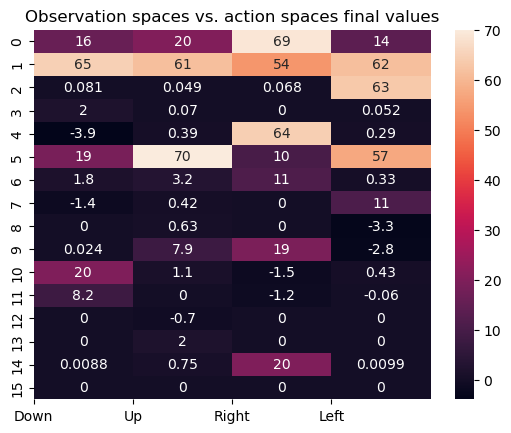

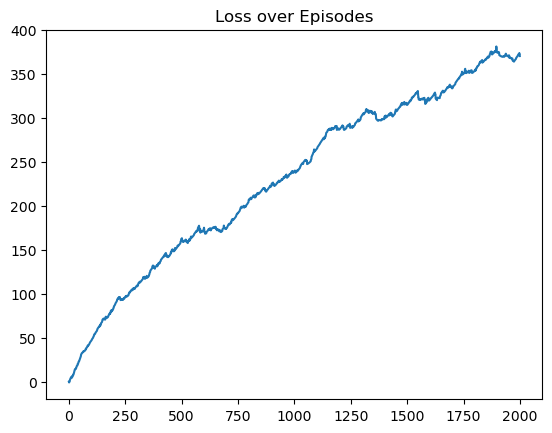

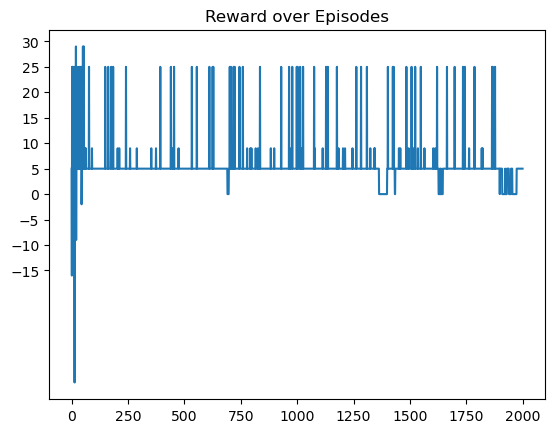

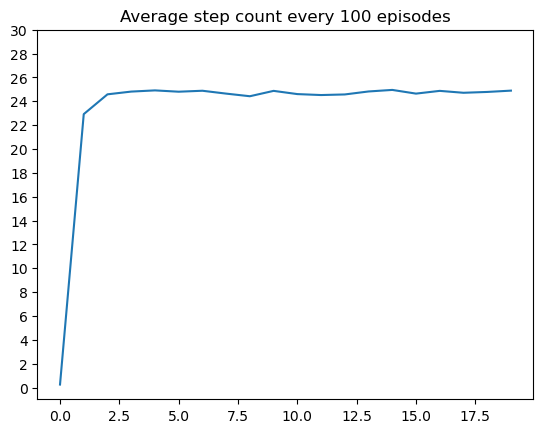

In [79]:
#action_labels={0: "(Down)", 1:"(Up)", 2: "(Right)", 3:"(Left)"}

seaborn.heatmap(Q, annot=True)
plt.title("Observation spaces vs. action spaces final values")
plt.xticks([0,1,2,3],['Down', 'Up', 'Right', 'Left'])
plt.show()
plt.plot(loss)
plt.title("Loss over Episodes")
plt.show()
plt.plot(reward)
plt.title("Reward over Episodes")
plt.yticks(np.arange(-15, 35, step=5))
plt.show()
plt.plot(avg_step)
plt.title("Average step count every 100 episodes")
plt.yticks(np.arange(0, 31, step=2))
plt.show()

In [80]:
#Gamma = 0.5 (extremely discounted rewards)

#define parameters
timestep=25
total_episodes = 2000
alpha = 0.1
gamma = 0.5
epsilon = 1
decay=(0.01/epsilon)**(1/total_episodes)

#define new environment
env = GameEnv(timestep)
env.reset()

Q, reward, loss, avg_step = SARSA(env, timestep, total_episodes, alpha, gamma, epsilon, decay)

Episode 1 / 2000 complete
Current Q-table:
 [[ 0.025  0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]
 [-0.7    0.     0.5    0.   ]
 [ 0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]
 [ 0.     0.    -0.6    0.   ]
 [ 2.     0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]] 


Episode 101 / 2000 complete
Current Q-table:
 [[ 2.36389357e-01  6.41899395e-02  3.88090810e-01  3.23043185e-02]
 [ 5.30017218e-01  3.66815393e-01  1.33452333e-01  2.73042925e-01]
 [ 7.59469490e-02  9.36117500e-04  4.84538954e-02  5.85240509e-01]
 [ 1.44833058e-01  1.24841129e-01  1.23356098e-01  7.19073938e-02]
 [-3.27957733e+00  1.27340905e-01  3.92034713e-01  3.71175381e-01]
 [ 2.14536807e-01  3.52499780e-01  2.78116731e-01  2.81302039e-01]
 [ 7.902

Episode 1401 / 2000 complete
Current Q-table:
 [[ 3.01000706e+00  7.54082979e-01  2.22666596e-01  3.41155043e-01]
 [ 2.68071319e-01  2.69540585e-01  1.33452333e-01  6.32386357e-01]
 [ 7.59469490e-02  9.36117500e-04  4.84538954e-02  5.85240509e-01]
 [ 1.44365722e-01  1.24841129e-01  1.23356098e-01  7.19073938e-02]
 [-4.53229167e+00  5.11579036e-01  5.98546448e+00  8.40865457e-01]
 [ 2.47736138e+00  2.07279137e-01  2.06680684e-01  1.48556401e+00]
 [ 7.90260282e-02  8.06661839e-02  3.29386780e-01  1.15009903e-01]
 [-9.06760337e-01  9.47866670e-02  7.16060657e-02  2.19111485e-01]
 [ 6.82031079e-01  0.00000000e+00 -3.49550000e-02 -1.89841568e+00]
 [ 4.98836073e+00  2.36677202e-01  5.09531989e-01 -3.22046876e+00]
 [ 6.00298290e+00  7.45394034e-02 -2.28944840e+00  3.91151237e-02]
 [ 1.54246415e+01  0.00000000e+00 -1.62600000e+00  4.50000000e-03]
 [ 0.00000000e+00 -7.00000000e-01  3.52903340e+00  6.67694770e-03]
 [ 9.55678190e-01  7.01933928e-01  9.99999993e+00  3.13269983e-01]
 [ 3.50383645e+

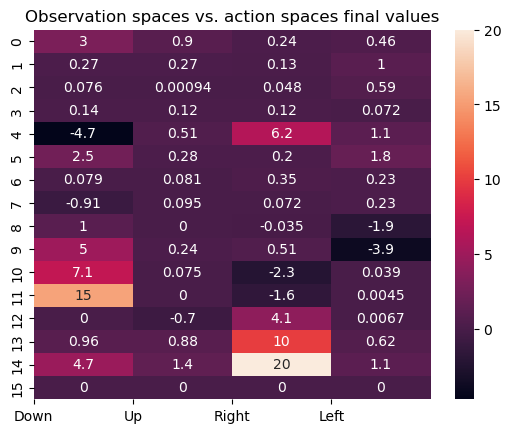

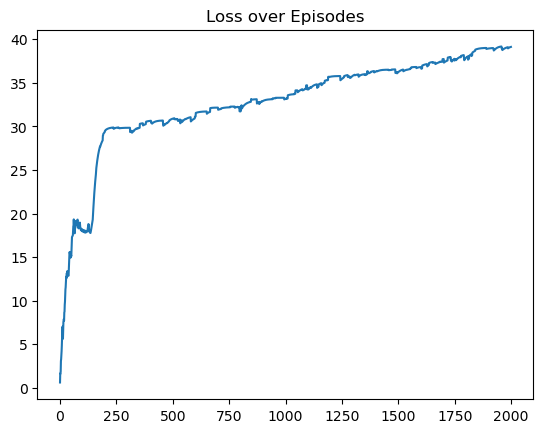

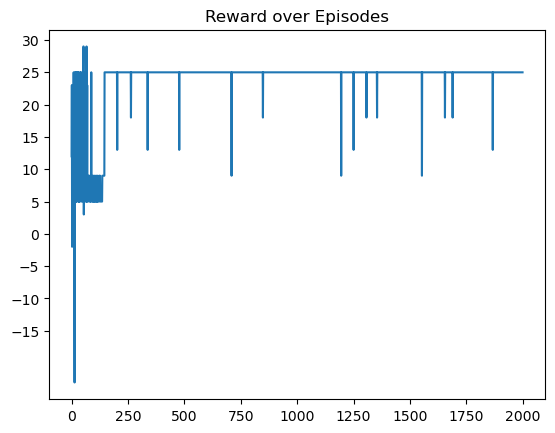

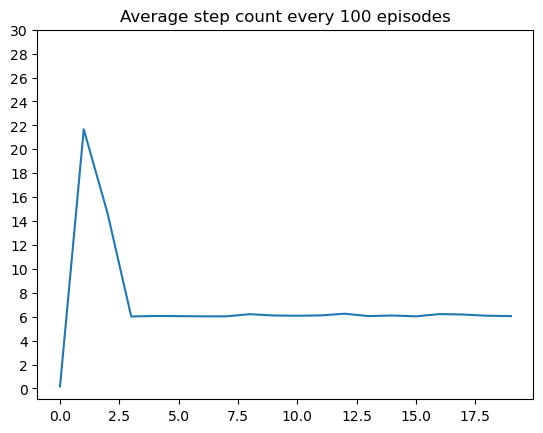

In [81]:
#action_labels={0: "(Down)", 1:"(Up)", 2: "(Right)", 3:"(Left)"}

seaborn.heatmap(Q, annot=True)
plt.title("Observation spaces vs. action spaces final values")
plt.xticks([0,1,2,3],['Down', 'Up', 'Right', 'Left'])
plt.show()
plt.plot(loss)
plt.title("Loss over Episodes")
plt.show()
plt.plot(reward)
plt.title("Reward over Episodes")
plt.yticks(np.arange(-15, 35, step=5))
plt.show()
plt.plot(avg_step)
plt.title("Average step count every 100 episodes")
plt.yticks(np.arange(0, 31, step=2))
plt.show()

References
1. RL textbook: http://incompleteideas.net/book/RLbook2020.pdf
2. Random Agent class demo
3. Q-learning vs SARSA (reference only): https://towardsdatascience.com/q-learning-and-sasar-with-python-3775f86bd178
4. Matplotlib documentation: https://matplotlib.org/stable/index.html



# PART III
#### Solve your environment using Q-learning

In [82]:
def Q_learning(env, timestep, total_episodes, alpha, gamma, epsilon, decay):

    # define parameters to track reward, loss, average steps for plots
    total_reward = []
    avg_loss = 0
    total_loss = []
    step_count = 0
    avg_steps = []

    # Initializing the Q table
    Q = np.zeros((env.observation_space.n, env.action_space.n))

    for episode in range(total_episodes):
        # print("Episode:", episode+1)
        ep_reward = 0
        step = 0
        state = env.reset()
        done = False

        while not done:
            step += 1
            # Selecting the action with maximum Q-value
            action = greedyEp(state, Q, epsilon)
            next_state, reward, done, info = env.step(action)

            # Calculating new Q table row at this state
            prediction = Q[np.where(state==1)[0][0]][action]
            target = reward + gamma * np.max(Q[np.where(next_state==1)[0][0]])
            loss = target - prediction
            avg_loss += loss
            Q[np.where(state==1)[0][0]][action] = Q[np.where(state==1)[0][0]][action] + alpha * loss
            state = next_state

            # Tracking reward
            ep_reward += reward

            # Decrease epsilon
            if epsilon > 0.01:
                epsilon = epsilon * decay

        # track data for plots and print progress periodically
        step_count += step       
        total_reward.append(ep_reward)
        total_loss.append(avg_loss / 20)
        if episode % 100 == 0:
            avg_steps.append(step_count / 100)
            step_count = 0
            print("Episode", episode + 1, "/", total_episodes, "complete")
            print("Current Q-table:\n", Q, "\n\n")

    print("Episode", episode + 1, "/", total_episodes, "complete")
    print("Current Q-table:\n", Q, "\n\n")
    print("Done!")
    return Q, total_reward, total_loss, avg_steps


In [94]:
#define parameters
timestep=30
total_episodes = 2000
alpha = 0.1
gamma = 0.9
epsilon = 1
decay=(0.01/epsilon)**(1/total_episodes)

#define new environment
env = GameEnv(timestep)
env.reset()
Q_q, reward_q, loss_q, avg_step_q = Q_learning(env, timestep, total_episodes, alpha, gamma, epsilon, decay)

Episode 1 / 2000 complete
Current Q-table:
 [[ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.5  0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.  -0.6  0. ]
 [ 2.   0.  -0.6  0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]] 


Episode 101 / 2000 complete
Current Q-table:
 [[ 8.87941438  1.16832705  0.7632507   0.7942942 ]
 [ 3.50919516  0.52853793  0.31214548  0.49990079]
 [ 0.09898883  0.02207392  0.15371415  0.9286863 ]
 [ 0.31582453  0.18281287  0.13734818  0.11817169]
 [-4.9118398   1.39893934 12.81568334  2.30517319]
 [11.50834567  1.42027385  1.81944388  2.2932166 ]
 [ 0.19531967  0.04629824  3.80568862  0.27275879]
 [ 2.74384266  0.31496997  0.10494839  0.        ]
 [ 0.16735528  2.22391947  0.         -0.56993704]
 [14.71348065  0.28355888  0.         -1.85892752]
 [ 1.5068124   0.         -0

Episode 1201 / 2000 complete
Current Q-table:
 [[16.16265561  6.67146003  1.34982068  3.38731437]
 [ 8.13828487  0.52853793  0.31214548  0.49990079]
 [ 0.09898883  0.02207392  0.15371415  0.9286863 ]
 [ 0.31582453  0.18281287  0.13734818  0.11817169]
 [-4.15250801  4.98209646 18.05052953  5.83603537]
 [14.58        2.7407209   2.14849623  4.952991  ]
 [ 0.19531967  0.04629824  4.35393207  0.27275879]
 [ 3.67894802  0.31496997  0.10494839  0.        ]
 [ 0.16735528  9.40300857  0.         -0.56993704]
 [16.2         5.54102815  3.11453576 -1.73711812]
 [12.824173    0.         -0.6205938   0.        ]
 [15.88217736  0.05663595 -0.6         0.        ]
 [ 0.         -3.56451138  4.30956164  0.02706204]
 [ 3.07796632  5.60802822 18.          0.39391026]
 [ 5.2336062   3.3799088  20.          1.69625335]
 [ 0.          0.          0.          0.        ]] 


Episode 1301 / 2000 complete
Current Q-table:
 [[16.25878855  7.47025983  1.34982068  3.38731437]
 [ 8.13828487  0.52853793  0.312145

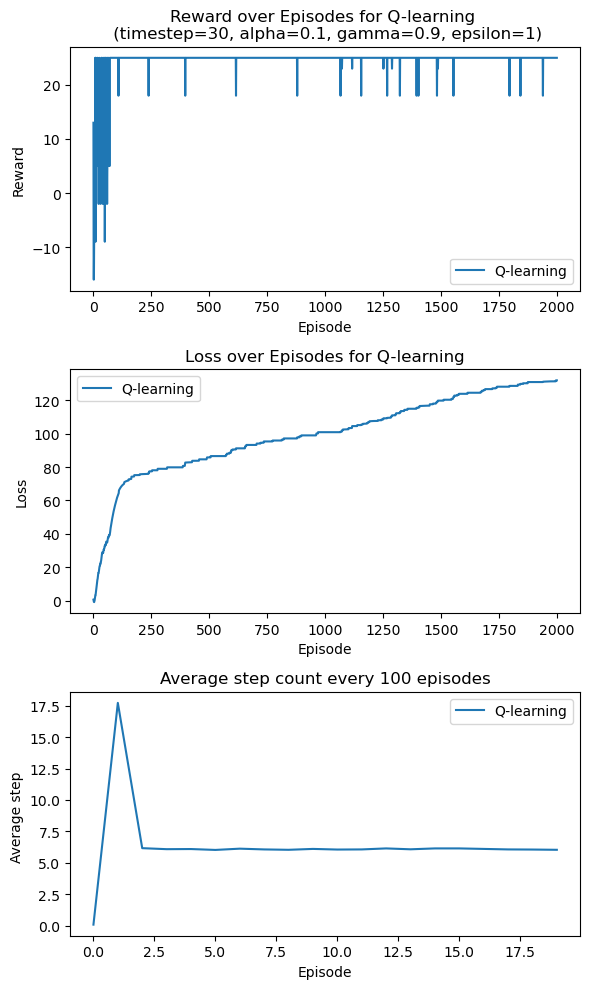

In [95]:
fig, axs = plt.subplots(3, 1, figsize=(6, 10))

axs[0].plot(reward_q, label='Q-learning')
axs[0].set_title(f'Reward over Episodes for Q-learning \n (timestep={timestep}, alpha={alpha}, gamma={gamma}, epsilon={epsilon})')
axs[0].set_xlabel('Episode')
axs[0].set_ylabel('Reward')
axs[0].legend()

axs[1].plot(loss_q, label='Q-learning')
axs[1].set_title('Loss over Episodes for Q-learning')
axs[1].set_xlabel('Episode')
axs[1].set_ylabel('Loss')
axs[1].legend()

axs[2].plot(avg_step_q, label='Q-learning')
axs[2].set_title("Average step count every 100 episodes")
axs[2].set_xlabel('Episode')
axs[2].set_ylabel('Average step ')
axs[2].legend()

plt.tight_layout()
plt.show()

## Turning Parameter

Parameter #1: Number of Max Timesteps

In [96]:
#define parameters
timestep=19
total_episodes = 2000
alpha = 0.1
gamma = 0.9
epsilon = 1
decay=(0.01/epsilon)**(1/total_episodes)

#define new environment
env = GameEnv(timestep)
env.reset()
Q_q, reward_q, loss_q, avg_step_q = Q_learning(env, timestep, total_episodes, alpha, gamma, epsilon, decay)

Episode 1 / 2000 complete
Current Q-table:
 [[0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.5 0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]] 


Episode 101 / 2000 complete
Current Q-table:
 [[ 1.12930433e+01  2.96038918e+00  2.18155590e+00  1.80253620e+00]
 [ 4.48819477e+00  2.32624870e-01  1.94559896e-03  1.99138168e-01]
 [ 4.78407175e-01  0.00000000e+00  0.00000000e+00  9.87795000e-04]
 [ 2.41513184e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.33245438e+00  2.57208352e+00  1.46645464e+01  2.37960530e+00]
 [ 1.25606469e+01  3.09581045e+00  7.97890947e-01  3.43288408e+00]
 [ 1.06923191e+00  5.46284715e-02  1.69703338e+00  9.26141154e-01]
 [-1.12200000e+00  1.43762538e-01  9.84156531e-02  1.54851575e+00]
 [ 1.57251710e-01  2.64309073e+00  1.06785744e+00 -2.74401004e+00]

Episode 801 / 2000 complete
Current Q-table:
 [[ 1.63098000e+01  5.16174493e+00  3.53713212e+00  6.18196425e+00]
 [ 9.94372047e+00  2.32624870e-01  1.94559896e-03  1.99138168e-01]
 [ 4.78407175e-01  0.00000000e+00  0.00000000e+00  9.87795000e-04]
 [ 2.41513184e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-4.86906595e+00  2.57208352e+00  1.81220000e+01  6.97200532e+00]
 [ 1.45800000e+01  3.93587166e+00  8.70834857e-01  5.87948718e+00]
 [ 1.06923191e+00  5.46284715e-02  1.74872785e+00  9.26141154e-01]
 [-1.12200000e+00  1.43762538e-01  9.84156531e-02  1.62228137e+00]
 [ 1.57251710e-01  7.26974305e+00  1.06785744e+00 -2.74401004e+00]
 [ 1.62000000e+01  1.45595869e+00  1.80541393e+00 -2.57988796e+00]
 [ 1.17443433e+01  0.00000000e+00 -3.44400000e-01  1.05859354e-01]
 [ 6.87800000e+00  0.00000000e+00  0.00000000e+00  2.96846056e-01]
 [ 7.74275693e-02 -1.31751329e+00  9.20338768e+00  0.00000000e+00]
 [ 5.57296613e+00  5.36828368e+00  1.80000000e+01  2.72484176e+00]
 [ 8.82543094e+0

Episode 1701 / 2000 complete
Current Q-table:
 [[ 1.63098000e+01  7.74087227e+00  7.04234443e+00  7.03164983e+00]
 [ 1.39986980e+01  2.32624870e-01  1.94559896e-03  1.99138168e-01]
 [ 4.78407175e-01  0.00000000e+00  0.00000000e+00  9.87795000e-04]
 [ 2.41513184e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.92632052e+00  4.87236345e+00  1.81220000e+01  7.90578479e+00]
 [ 1.45800000e+01  5.76740773e+00  9.41136878e-01  5.87948718e+00]
 [ 1.06923191e+00  5.46284715e-02  1.80468797e+00  9.26141154e-01]
 [-1.12200000e+00  1.43762538e-01  9.84156531e-02  1.68245161e+00]
 [ 1.57251710e-01  1.03786186e+01  1.06785744e+00 -2.74401004e+00]
 [ 1.62000000e+01  4.61745588e+00  3.67391427e+00 -2.57988796e+00]
 [ 1.38956636e+01  0.00000000e+00 -3.44400000e-01  1.05859354e-01]
 [ 6.87800000e+00  0.00000000e+00  0.00000000e+00  2.96846056e-01]
 [ 7.74275693e-02 -1.31751329e+00  1.05327440e+01  0.00000000e+00]
 [ 6.63566951e+00  6.28945531e+00  1.80000000e+01  3.84387063e+00]
 [ 1.13117392e+

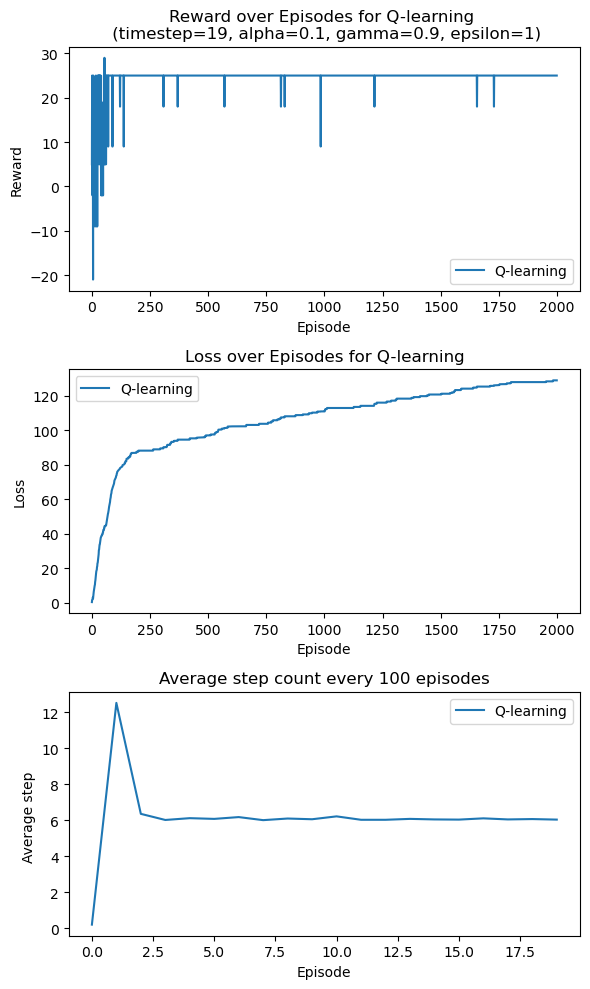

In [97]:
fig, axs = plt.subplots(3, 1, figsize=(6, 10))

axs[0].plot(reward_q, label='Q-learning')
axs[0].set_title(f'Reward over Episodes for Q-learning \n (timestep={timestep}, alpha={alpha}, gamma={gamma}, epsilon={epsilon})')
axs[0].set_xlabel('Episode')
axs[0].set_ylabel('Reward')
axs[0].legend()

axs[1].plot(loss_q, label='Q-learning')
axs[1].set_title('Loss over Episodes for Q-learning')
axs[1].set_xlabel('Episode')
axs[1].set_ylabel('Loss')
axs[1].legend()

axs[2].plot(avg_step_q, label='Q-learning')
axs[2].set_title("Average step count every 100 episodes")
axs[2].set_xlabel('Episode')
axs[2].set_ylabel('Average step ')
axs[2].legend()

plt.tight_layout()
plt.show()

**Explanation:** Based on the results of the first plot, we observed that the highest average step count was around 19. To further investigate, we modified the timestep to 19 and noticed an additional positive reward before episode 250. 

Parameter #2: Decrease learning-rate (alpha)

In [100]:
#define parameters
timestep=15
total_episodes = 2000
alpha = 0.01
gamma = 0.9
epsilon = 1
decay=(0.01/epsilon)**(1/total_episodes)

#define new environment
env = GameEnv(timestep)
env.reset()
Q_q, reward_q, loss_q, avg_step_q = Q_learning(env, timestep, total_episodes, alpha, gamma, epsilon, decay)

Episode 1 / 2000 complete
Current Q-table:
 [[ 0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.     ]
 [-0.1393   0.       0.       0.     ]
 [ 0.00045  0.       0.       0.     ]
 [ 0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.     ]
 [ 0.       0.05     0.       0.     ]
 [ 0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.     ]] 


Episode 101 / 2000 complete
Current Q-table:
 [[ 1.63753113e-02  1.31454525e-02  7.24653642e-01  4.84753669e-03]
 [ 1.85656906e+00  2.48734342e-01  1.02439160e-02  2.89569420e-02]
 [ 1.25711895e-02  5.02883623e-04  2.11119984e-03  1.33254207e-01]
 [ 1.56916338e-01  0.00000000e+00  0.00000000e+00  8.02197107e-06]
 [-5.40678061e

Episode 1101 / 2000 complete
Current Q-table:
 [[ 1.63753113e-02  4.32440886e-02  3.41712471e+00  7.38433770e-02]
 [ 3.81114584e+00  7.00756115e-01  4.20532007e-02  4.41406729e-01]
 [ 1.25711895e-02  5.02883623e-04  2.11119984e-03  5.03447403e-01]
 [ 1.56916338e-01  0.00000000e+00  0.00000000e+00  8.02197107e-06]
 [-5.40678061e-01  1.15478144e-03  7.19613001e-01  3.01491008e-03]
 [ 5.66759378e-02  3.45191721e+00  2.51928770e-01  9.42366446e-02]
 [ 3.13681697e-05  9.24019675e-04  1.11487891e+00  5.47802673e-02]
 [-4.57053375e-01  4.87744510e-03  6.02255020e-03  5.60689820e-01]
 [ 0.00000000e+00  9.53896571e-03  4.29581956e-04 -2.07876714e-01]
 [ 0.00000000e+00  5.48402739e-01  0.00000000e+00 -3.42996825e-01]
 [ 0.00000000e+00  4.05957059e-03 -5.29072818e-02  4.37193931e-04]
 [ 1.72965505e+00  0.00000000e+00 -4.77717626e-02  1.18181566e-05]
 [ 0.00000000e+00 -1.39300000e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+

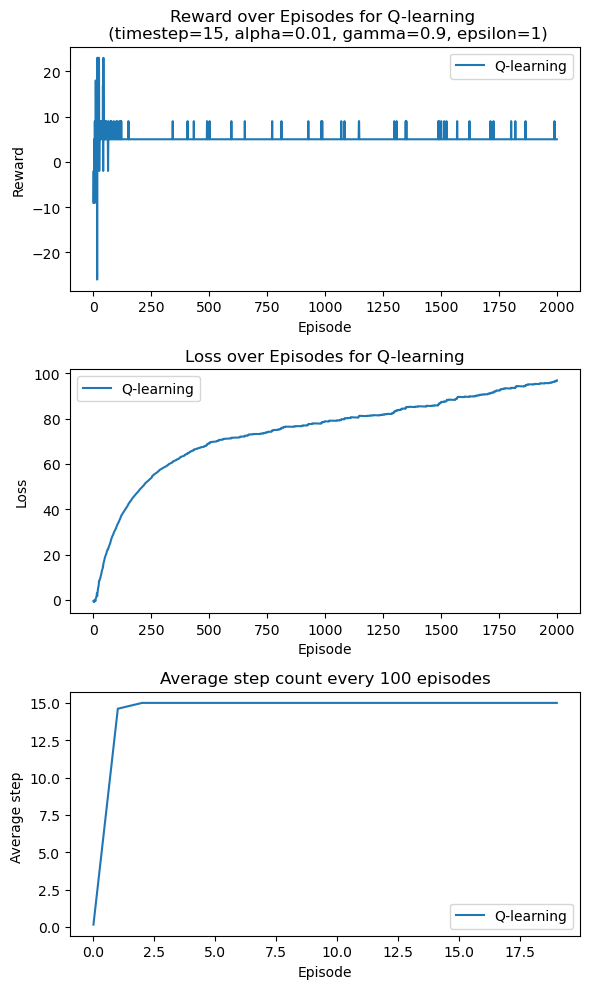

In [101]:
fig, axs = plt.subplots(3, 1, figsize=(6, 10))

axs[0].plot(reward_q, label='Q-learning')
axs[0].set_title(f'Reward over Episodes for Q-learning \n (timestep={timestep}, alpha={alpha}, gamma={gamma}, epsilon={epsilon})')
axs[0].set_xlabel('Episode')
axs[0].set_ylabel('Reward')
axs[0].legend()

axs[1].plot(loss_q, label='Q-learning')
axs[1].set_title('Loss over Episodes for Q-learning')
axs[1].set_xlabel('Episode')
axs[1].set_ylabel('Loss')
axs[1].legend()

axs[2].plot(avg_step_q, label='Q-learning')
axs[2].set_title("Average step count every 100 episodes")
axs[2].set_xlabel('Episode')
axs[2].set_ylabel('Average step ')
axs[2].legend()

plt.tight_layout()
plt.show()

**Explanation:** The set of hyperparameters used starts with a high level of exploration due to a high initial value for epsilon and a low decay rate. The learning-rate is also decreased which improves the average loss.

Parameter #3: Decrease epsilon

In [109]:
#define parameters
timestep=15
total_episodes = 2000
alpha = 0.01
gamma = 0.9
epsilon = 0.4
decay=(0.01/epsilon)**(1/total_episodes)

#define new environment
env = GameEnv(timestep)
env.reset()
Q_q, reward_q, loss_q, avg_step_q = Q_learning(env, timestep, total_episodes, alpha, gamma, epsilon, decay)

Episode 1 / 2000 complete
Current Q-table:
 [[0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.05 0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.2  0.  ]
 [0.   0.   0.   0.  ]] 


Episode 101 / 2000 complete
Current Q-table:
 [[ 7.90637743e-01  1.31470577e-02  2.64387040e-03  2.39612361e-03]
 [ 2.18467224e-01  4.70900964e-04  0.00000000e+00  1.02683728e-03]
 [ 6.99151469e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-9.78314704e-01  4.17013298e-02  1.96811438e+00  1.14641262e-01]
 [ 2.17745204e-03  1.15003327e-02  1.23181342e-02  1.55287855e+00]
 [ 1.74665047e-04  0.00000000e+00  2.94239985e-01  1.93098305e-03]
 [-6.00000000e-02  0.00000000e+00  1.94738922e-04  5.82169230e-02]
 [

Episode 901 / 2000 complete
Current Q-table:
 [[ 3.40589857e+00  4.99338641e-02  4.78245605e-03  8.40438834e-02]
 [ 5.48967312e-01  4.70900964e-04  0.00000000e+00  1.02683728e-03]
 [ 6.99151469e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.68775773e+00  4.07392663e-01  3.80674250e+00  4.58871549e-01]
 [ 4.54994489e-02  6.00804318e-02  4.86759864e-02  3.44239599e+00]
 [ 3.93480831e-04  0.00000000e+00  4.98679599e-01  1.93098305e-03]
 [-6.00000000e-02  0.00000000e+00  1.94738922e-04  1.56802115e-01]
 [ 7.58884661e-05  4.66017807e-01  0.00000000e+00 -6.99995158e-02]
 [ 1.62000000e-05  5.14194468e-01  0.00000000e+00 -7.00000000e-02]
 [ 4.31009821e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 6.62696410e-06  0.00000000e+00  3.20962434e-03  0.00000000e+00]
 [ 1.43065391e-04  0.00000000e+00  9.64742470e-02  2.56797423e-06]
 [ 2.78111868e-0

Episode 1901 / 2000 complete
Current Q-table:
 [[ 3.40539067e+00  8.01328934e-02  1.94949964e-02  8.40438834e-02]
 [ 1.04338928e+00  4.70900964e-04  0.00000000e+00  1.02683728e-03]
 [ 8.72035465e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.30754388e+00  7.57459834e-01  3.78506785e+00  1.04962586e+00]
 [ 1.24634298e-01  1.59723576e-01  1.67447829e-01  3.42141230e+00]
 [ 3.93480831e-04  6.29236322e-06  8.92021633e-01  1.93098305e-03]
 [-6.00000000e-02  0.00000000e+00  1.94738922e-04  3.88033812e-01]
 [ 7.58884661e-05  8.54168472e-01  0.00000000e+00 -1.33041644e-01]
 [ 1.62000000e-05  8.30032537e-01  0.00000000e+00 -7.00000000e-02]
 [ 4.31009821e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 6.62696410e-06  0.00000000e+00  3.20962434e-03  0.00000000e+00]
 [ 1.43065391e-04  0.00000000e+00  9.64742470e-02  2.56797423e-06]
 [ 2.78111868e-

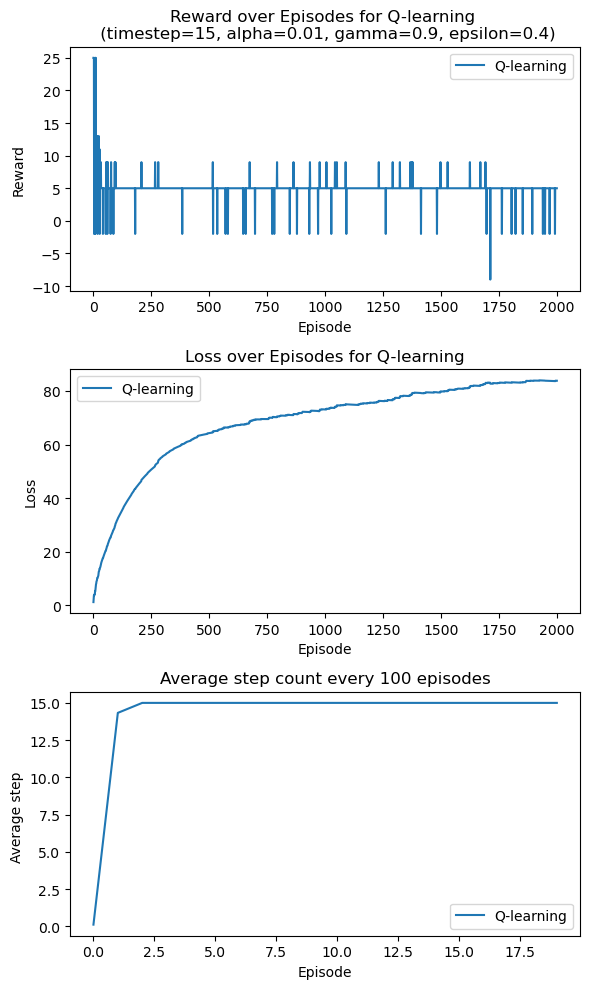

In [110]:
fig, axs = plt.subplots(3, 1, figsize=(6, 10))

axs[0].plot(reward_q, label='Q-learning')
axs[0].set_title(f'Reward over Episodes for Q-learning \n (timestep={timestep}, alpha={alpha}, gamma={gamma}, epsilon={epsilon})')
axs[0].set_xlabel('Episode')
axs[0].set_ylabel('Reward')
axs[0].legend()

axs[1].plot(loss_q, label='Q-learning')
axs[1].set_title('Loss over Episodes for Q-learning')
axs[1].set_xlabel('Episode')
axs[1].set_ylabel('Loss')
axs[1].legend()

axs[2].plot(avg_step_q, label='Q-learning')
axs[2].set_title("Average step count every 100 episodes")
axs[2].set_xlabel('Episode')
axs[2].set_ylabel('Average step ')
axs[2].legend()

plt.tight_layout()
plt.show()

**Explanation:** The agent has already learned a good policy, therefore decreasing epsilon can lead to more consistent and reliable performance over time. It is leading to more positive rewards.